In [1]:
#import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
#load the iris dataset, it is a python dictionary
iris = datasets.load_iris()
#this converting is only for visualization purposes
iris_df = pd.DataFrame(data=iris["data"], columns=iris["feature_names"])
print(iris_df.head())
print(np.unique(iris.target))
print({0: "Iris-Setosa", 1: "Iris-Versicolour", 2:"Iris-Virginica" })

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 1 2]
{0: 'Iris-Setosa', 1: 'Iris-Versicolour', 2: 'Iris-Virginica'}


In [3]:
#let us build a svm classifier between Iris Versicolor and Iris Virginica
#Task: Identify virginica from the rest based on  petal length (column 2) and petal width (column 3)
X_kmeans = iris["data"][:, (2, 3)]  # petal length, petal width

y_kmeans = iris["target"].reshape(150, 1)
# 1 if Iris virginica, else 0
print(X_kmeans.shape, y_kmeans.shape)

(150, 2) (150, 1)


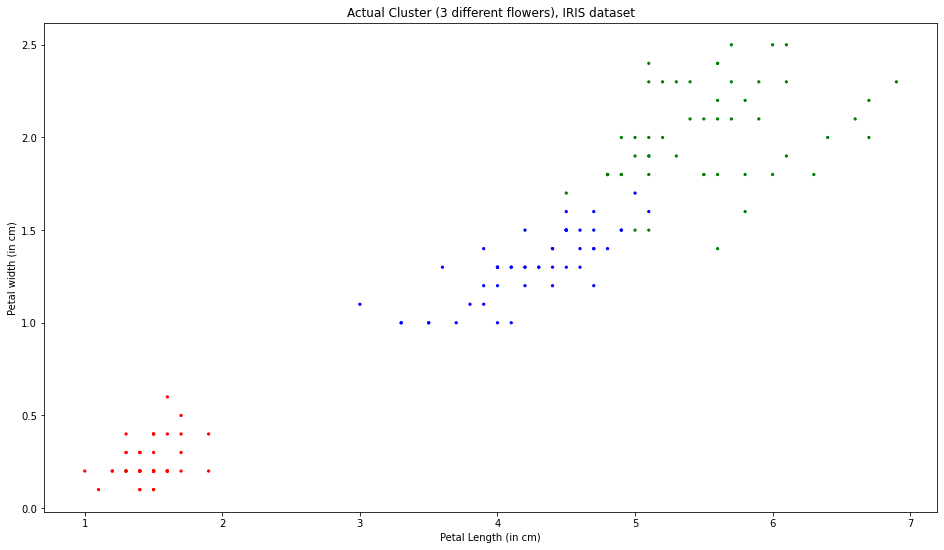

In [4]:
def plot_scatter(X, y, t):
    plt.figure(figsize=(16, 9))
    plt.title(t)
    plt.xlabel('Petal Length (in cm)')
    plt.ylabel("Petal width (in cm)")
    #get all the cluster labels
    cl = np.unique(y)
    colors = ['r', 'b', 'g', 'c', 'm', 'brown']
    for i in range(len(cl)):
        plt.scatter(X[:, 0], X[:, 1], s=5*(y==cl[i]), marker='o', color = colors[i]) 

    plt.show()

plot_scatter(X_kmeans, y_kmeans, "Actual Cluster (3 different flowers), IRIS dataset")

In [5]:
#writing the kmeans algorithm
def find_distance_matrix(X, centroids):
    #return distance of the form (num_examples, num_centroids)
    distance_matrix = np.zeros(shape=(X.shape[0], centroids.shape[0]))
    for i in range(X.shape[0]):
        for j in range(centroids.shape[0]):
            #taking the l2 norm, the i, j th position store the distance of the ith point from the jth cluster (i --> d1, .. dk)
            distance_matrix[i, j] = np.linalg.norm(X[i, :] - centroids[j, :], ord=2)
    return distance_matrix


def cluster_kmeans(X, num_clusters, num_iter = 50):
    #sample number of cluster points, provide the end points
    min_coordinate = [0, 0]
    max_coordinate = [7, 2.5]
    #gets k randomly sampled points
    c_points = np.random.uniform(low=min_coordinate, high=max_coordinate, size=(num_clusters, 2))
    
    distance_matrix = None
    for i in range(num_iter):
        #get the distance of each of the points from the cluster points
        distance_matrix = find_distance_matrix(X, c_points)
        #get the cluster label indices (closest cluster), the columns are shrinked
        clabel = np.argmin(distance_matrix, axis=1, keepdims=True)
        #update the weights c_points according to the sample mean
        #now we have a single number for every data point which indicates to which cluster the point belongs to
        
        #repositioning of centroids
        for j in range(num_clusters):
            #returns the points labeled as cluster j
            idx = np.where(clabel.squeeze() == j)[0]
            #take their mean, collapse across rows (i.e., examples)
            if len(idx) != 0:
                #coordinate of the centroids according to the redistribution
                c_points[j, :] = np.mean(X[idx], axis = 0, keepdims=True)
            #print(c_points)
    y = np.argmin(distance_matrix, axis=1, keepdims=True)
    #get the labeling
    return y

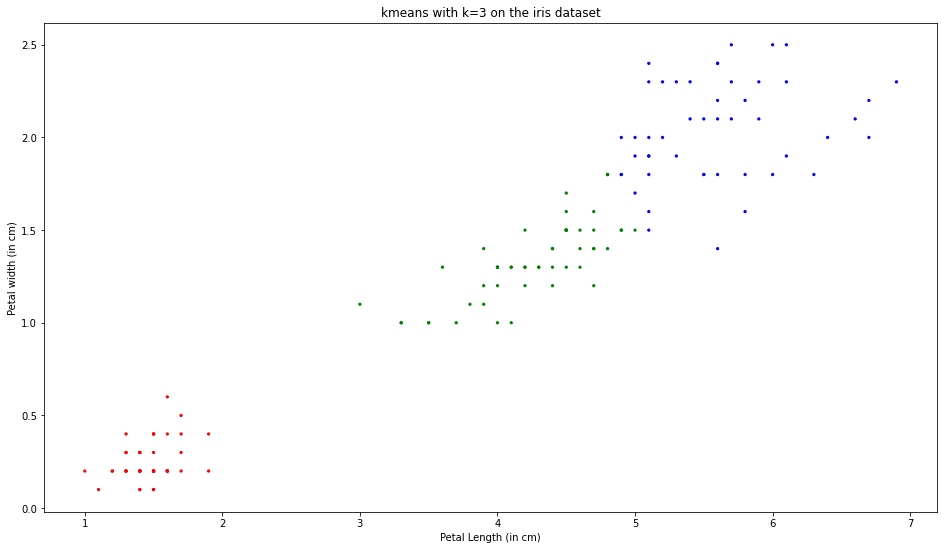

In [6]:
y_labels_clustered = cluster_kmeans(X_kmeans, 3, 100)
plot_scatter(X_kmeans, y_labels_clustered, "kmeans with k=3 on the iris dataset")

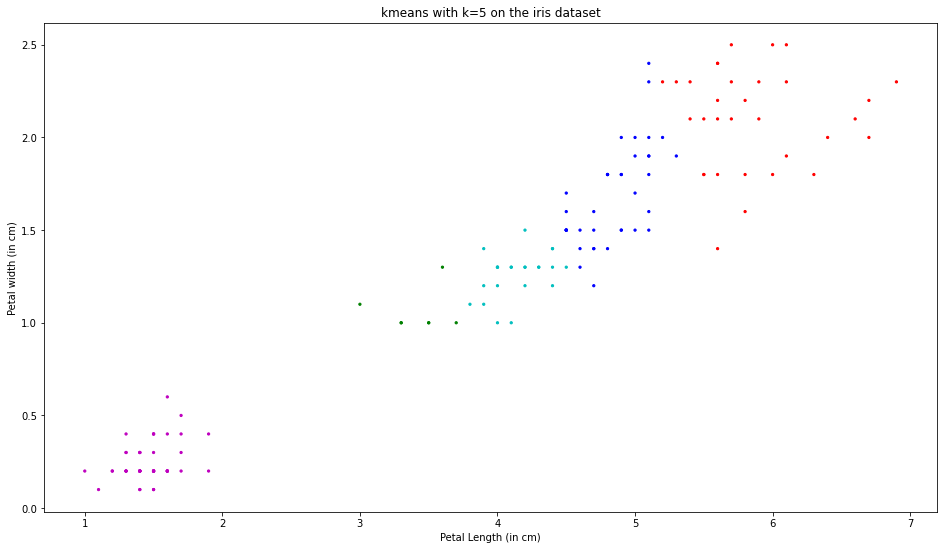

In [10]:
y_labels_clustered = cluster_kmeans(X_kmeans, 5, 100)
plot_scatter(X_kmeans, y_labels_clustered, "kmeans with k=5 on the iris dataset")

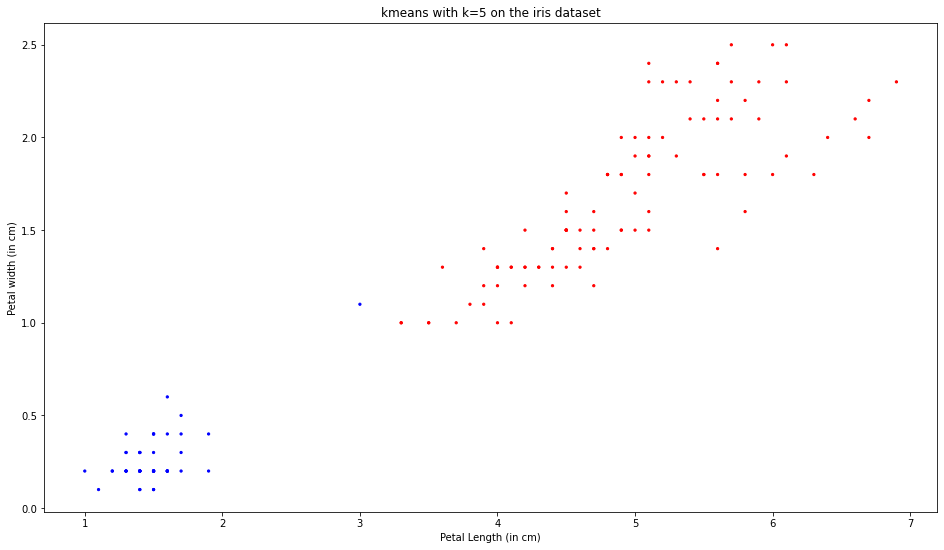

In [7]:
y_labels_clustered = cluster_kmeans(X_kmeans, 2, 100)
plot_scatter(X_kmeans, y_labels_clustered, "kmeans with k=5 on the iris dataset")